In [104]:
import random
"""
point[index, (x,y)]
layout[index, place]
"""
point=[]
layout=[]
# filename = "./readytorun.txt"
filename = "./DenseMap/DenseMapReadyToRun/DenseMap_0250_01.txt"

In [105]:
def prepare_data(select):
    point.clear()
    layout.clear()
    num = 1
    for line in open(filename):
        index, x, y = line.strip().split(" ")
        if int(index) % select == 0:
            point.extend([(num,(float(x),float(y)))])
            num = num + 1
    for i in range(len(point)):
        layout.append([i+1, random.randint(1,4), 0])
    # print(layout[:])
    # print(point[:])

In [106]:
prepare_data(1)

In [107]:
# gapx, gapy = 100, 50
gapx, gapy = 20, 8
def getPos(i,m):
    pointx = point[i][1][0]
    pointy = point[i][1][1]
    # print(pointx, pointy)
    if m==1:
        return [(pointx,pointy),(pointx+gapx,pointy),(pointx+gapx,pointy+gapy),(pointx,pointy+gapy)]
    elif m==2:
        return [(pointx-gapx,pointy),(pointx,pointy),(pointx,pointy+gapy),(pointx-gapx,pointy+gapy)]
    elif m==3:
        return [(pointx-gapx,pointy-gapy),(pointx,pointy-gapy),(pointx,pointy),(pointx-gapx,pointy)]
    else:
        return [(pointx, pointy-gapy),(pointx+gapx,pointy-gapy),(pointx+gapx,pointy),(pointx,pointy)]
    
print(getPos(1,2))

[(330.939, 235.269), (350.939, 235.269), (350.939, 243.269), (330.939, 243.269)]


In [108]:
def inner(point, rec):
    if point[0] > rec[0][0] and point[1] > rec[0][1] and point[0] < rec[1][0] and point[1] > rec[1][1] and point[0] < rec[2][0] and point[1] < rec[2][1] and point[0] > rec[3][0] and point[1] < rec[3][1]:
        return True
    return False

In [109]:
def conflict(vect,i,j):
    """
    判断冲突
    """
    m = vect[i][1]
    n = vect[j][1]
    reci = getPos(i,m)
    recj = getPos(j,n)
    for i in range(len(reci)):
        if inner(reci[i], recj):
            return True
    return False


In [110]:
def costconfilct(vect):
    """
    计算每个点冲突
    """
    sum = 0
    for i in range(len(point)):
        temp = 0
        for j in range(len(point)):
            if i != j:
                if(conflict(vect,i,j)):
                    temp = temp + 1
        vect[i][2] = temp
        sum = sum + temp
    # print("conflict:"+str(sum))
    return sum

# print(costroad(layout))

In [111]:
costconfilct(layout)

154

In [112]:
def cost_function(layout):
    res = 0
    for i in range(len(point)):
        res = res + layout[i][1]*0.1
    # print(res)
    return res
print(cost_function(layout))

62.599999999999994


In [113]:
def costroad(vect):
    """
    计算每个点cost
    """
    conflict = costconfilct(vect)
    # print("heavy")
    # print(conflict)
    conflict = 3*conflict + cost_function(vect)
    # print(conflict)
    return conflict
    # sum = 0
    # for i in range(len(point)):
    #     temp = 0
    #     for j in range(len(point)):
    #         if i != j:
    #             if(conflict(vect,i,j)):
    #                 temp = temp + 1
    #     vect[i][2] = temp
    #     sum = sum + temp
    # print("cost:"+str(sum))
    # return sum
costroad(layout)

524.6

In [114]:
def costrod_lite(new_set, old_set, pointx):
    conflict_sum = 0
    for i in range(len(point)):
        a = conflict(new_set, i, pointx-1)
        b = conflict(old_set, i, pointx-1)
        # print(i,pointx,a,b)
        if a is True and b is False:
            # conflict_sum = conflict_sum + 1
            new_set[i][2] = new_set[i][2]+1
        elif a is False and b is True:
            # conflict_sum = conflict_sum - 1
            new_set[i][2] = new_set[i][2]-1
    # print(new_set[pointx-1][1], old_set[pointx-1][1])
    for i in range(len(point)):
        conflict_sum = conflict_sum + new_set[i][2]
    # print("lite")
    # print(conflict_sum)
    conflict_sum = 3*conflict_sum + cost_function(new_set) - new_set[pointx-1][1]*0.1 + old_set[pointx-1][1]*0.1
    return conflict_sum

In [115]:
import matplotlib.pyplot as plt
def plot(layout,name):
        def create_rect(i, width, height):
                pointx = point[i][1][0]
                pointy = point[i][1][1]
                m = layout[i][1]
                if m==1:
                        x,y = pointx,pointy
                elif m==2:
                        x, y = pointx-width,pointy
                elif m==3:
                        x, y = pointx-width,pointy-height
                else:
                        x, y = pointx, pointy-height
                rect=plt.Rectangle(
                        (x, y),  # (x,y)矩形左下角
                        width,  # width长
                        height,  # height宽
                        # color='maroon', 
                        fill = False)
                return rect
        fig1 = plt.figure(figsize=(16,9))
        plt.axis('off')
        ax1 = fig1.add_subplot(111)

        for i in range(len(point)):
                ax1.add_patch(create_rect(i, gapx, gapy))
        # plt.xlim(2400,5200)
        # plt.ylim(7100,12812)
        plt.xlim(-20,500)
        plt.ylim(-20,500)
        plt.title("{}".format(name))
        plt.savefig("./result/resultImg-{}.svg".format(name), format="svg")
        plt.show()
# plot()
# plt.savefig('scatter.eps',dpi=600,format='eps')

In [116]:
def plot_withname(a,name):
        point_plot = []
        px = []
        py = []
        filename_plot = "./readytorun_withname.txt"
        for line in open(filename_plot):
                text, x, y = line.strip().split(",")
                point_plot.extend([(text,(float(x),float(y)))])
        for i in range(len(point_plot)):
                px.append(point[i][1][0])
                py.append(point[i][1][1])
        def text(i, width, height):
                pointx = point_plot[i][1][0]
                pointy = point_plot[i][1][1]
                m = a[i][1]
                text = point_plot[i][0]
                if m==1:
                        x,y = pointx,pointy
                elif m==2:
                        x, y = pointx-14*len(text),pointy
                elif m==3:
                        x, y = pointx-14*len(text),pointy-60
                else:
                        x, y = pointx, pointy-60
                plt.text(
                        x = x, # x 相对于原先的数据点向左偏移0.12个单位
                        y = y, # y 向上偏移0.05个单位
                        s = '{}'.format(text), # 数据格式
                        # fontsize=3
                        fontsize=8,
                        color ='r') # 颜色
                # return t
        fig1 = plt.figure(figsize=(16,9))
        plt.axis('off')
        ax1 = fig1.add_subplot(111)

        for i in range(len(point)):
                text(i, gapx, gapy)
        plt.xlim(2400,5200)
        plt.ylim(7100,12812)
        plt.scatter(px,py,s=1)
        plt.title("{}".format(name))
        plt.savefig("./result/{}.svg".format(name), format="svg")
        plt.show()

In [117]:
import copy
def tabusearch(iteration_times,cacu_time,tabu_length,origin_times,costf,printf,costflite,namefortest):
    """
    iteration_times为每一个初始解的迭代次数，cacu_time为候选集合长度，tabu_length为禁忌长度，
    origin_times为整个程序循环次数，可以理解为使用不同个初始解，costf为成本函数，printtravel为打印结果函数
    """
    def pan_move(move_step,tabu_move):  #判断移动是否在禁忌区域中，如果是返回True和该点索引，否则返回False和0
        if move_step in tabu_move:
            index = tabu_move.index(move_step)
            return(True,index)
        else:
            return(False,0)
    def pan_cost(cost,tabu_cost,t):  #判断该移动是否比禁忌区域中该移动小，如果小则返回True，否则返回False
        if cost<tabu_cost[t]:
            return(True)
        else:
            return(False)  
    def add_tabu(cost,move,tabu_cost,tabu_move,t):  #为禁忌区域添加移动和成本，若超过T则剔除最先进入的禁忌
        tabu_cost.append(cost)
        tabu_move.append(move)
        if len(tabu_cost)>t:
            del tabu_cost[0]
        if len(tabu_move)>t:
            del tabu_move[0]
        return(tabu_cost,tabu_move)
    def cacu(vec,t):    #为每一个初始解计算t次
        vec_set = []
        m_set = []
        cost_set = []
        h = []
        for i in range(t):
            v,m,c,h = move(vec,h)
            vec_set.append(v)
            m_set.append(m)
            cost_set.append(c)
        return(vec_set,m_set,cost_set)
    def cacu_tiqu(v1,m1,c1):    #从上述t次筛选最小的解向量，移动和成本
        t = c1.index(min(c1))
        v_max = v1[t]
        m_max = m1[t]
        c_max = c1[t]
        return(v_max,m_max,c_max)
    def move(vec,h):  #输出移动后的向量，和成本
        i = 1
        while i==1:
            sel = random.sample(vec,1)
            # print(sel)
            # m.sort()
            while True:
                nextPos = random.randint(1,4)
                if nextPos != sel[0][1]:
                    break
            m = [sel[0][0],sel[0][1],nextPos]
            if m not in h:
                h.append(m)
                vec_copy = copy.deepcopy(vec)
                vec_copy[sel[0][0]-1][1] = m[2]
                # vec_copy[vec_copy.index(m)][2] = cal
                # vec_copy[vec_copy.index(m[1])] = m[0]
                # print("vec是：")
                # print((vec_copy))
                cost = costflite(vec_copy, vec, m[0])
                # print("损失是："+str(cost))
                i = 0
                return(vec_copy,m,cost,h)
    finall_road = []
    finall_cost = []
    layout = []
    for t1 in range(origin_times):
        # road = [i for i in range(1,29)]
        # random.shuffle(road)
        layout.clear()
        for i in range(len(point)):
            layout.append([i+1, random.randint(1,4), 0])
        print("初始状态：")
        cc = costf(layout)
        print(cc)
        nameprefix = str(namefortest) + str(cc)
        plot(layout=layout,name=nameprefix)
        # plot_withname(a=layout,name=nameprefix)
        # print(costf(layout))
        # plot(layout)
        # fig1 = plt.figure()
        # ax1 = fig1.add_subplot(111)
        # for i in range(len(point)):
        #     ax1.add_patch(create_rect(i, gapx, gapy))
        # plt.xlim(2600,5000)
        # plt.ylim(7100,12312)
        # plt.show()

        tabu_cost = []
        tabu_move = []
        tabu_length = 7 + int(costconfilct(layout)*0.25)
        cacu_time = 1 + int(costconfilct(layout)*0.05)
        print("计算次数："+str(cacu_time))
        print("tabu长度："+str(tabu_length))
        for t in range(iteration_times):
            if t % 50 == 0:
                cacu_time = 1 + int(costconfilct(layout)*0.05)
                tabu_length = 7 + int(costconfilct(layout)*0.25)
                print("循环次数："+str(t)+"计算次数："+str(cacu_time))
                print("循环次数："+str(t)+"tabu长度："+str(tabu_length))
            i = 0
            while i==0:
                v1,m1,c1 = cacu(layout,cacu_time)
                v_m,m_m,c_m = cacu_tiqu(v1,m1,c1)
                key1 = pan_move(m_m,tabu_move)
                if key1[0]:
                    print("enter!")
                    if pan_cost(c_m,tabu_cost,key1[1]):
                        layout = v_m
                        finall_road.append(layout)
                        print("costfunc:"+str(c_m))
                        finall_cost.append(c_m)
                        tabu_cost,tabu_move = add_tabu(c_m,m_m,tabu_cost,tabu_move,tabu_length)
                        i=1
                    else:
                        v1.remove(v_m)
                        m1.remove(m_m)
                        c1.remove(c_m)
                        if len(v1)==0:
                            i = 1
                else:
                    # print("costfunc:"+str(c_m))
                    tabu_cost,tabu_move = add_tabu(c_m,m_m,tabu_cost,tabu_move,tabu_length)
                    layout = v_m
                    finall_road.append(layout)
                    finall_cost.append(c_m)
                    i = 1
    index = finall_cost.index(min(finall_cost))
    # s2 = datetime.datetime.now()
    # plot(finall_road[index])
    return(finall_road[index],min(finall_cost),printf(finall_road[index]),costconfilct(layout))


In [118]:
# tabusearch(iteration_times=1000,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print)
# # plot()

初始状态：
513.6


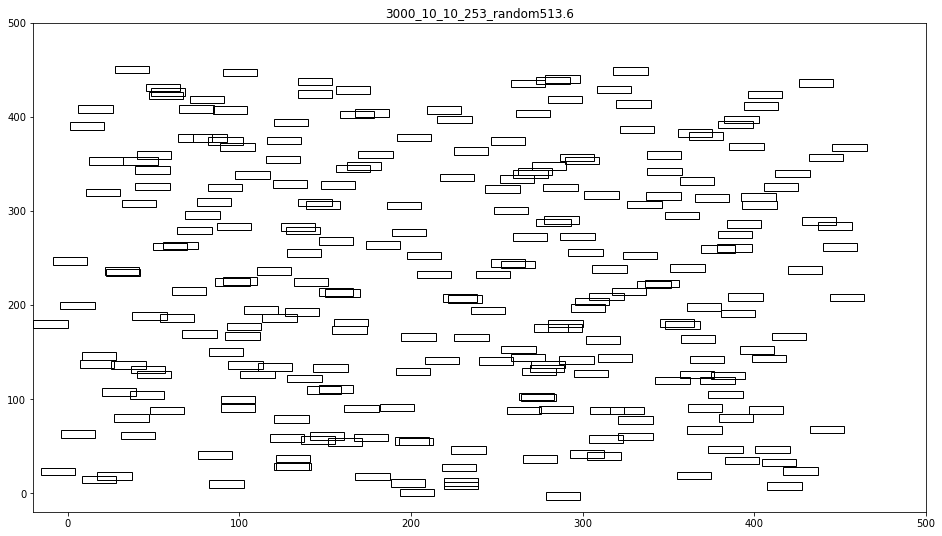

计算次数：8
tabu长度：44
循环次数：0计算次数：8
循环次数：0tabu长度：44
循环次数：50计算次数：4
循环次数：50tabu长度：22
循环次数：100计算次数：2
循环次数：100tabu长度：16
循环次数：150计算次数：3
循环次数：150tabu长度：17
enter!
costfunc:178.59999999999994
循环次数：200计算次数：2
循环次数：200tabu长度：14
循环次数：250计算次数：3
循环次数：250tabu长度：17
循环次数：300计算次数：2
循环次数：300tabu长度：14
循环次数：350计算次数：3
循环次数：350tabu长度：17
循环次数：400计算次数：2
循环次数：400tabu长度：14
循环次数：450计算次数：3
循环次数：450tabu长度：17
循环次数：500计算次数：2
循环次数：500tabu长度：14
循环次数：550计算次数：3
循环次数：550tabu长度：17
循环次数：600计算次数：3
循环次数：600tabu长度：17
循环次数：650计算次数：2
循环次数：650tabu长度：15
循环次数：700计算次数：3
循环次数：700tabu长度：17
循环次数：750计算次数：2
循环次数：750tabu长度：14
循环次数：800计算次数：3
循环次数：800tabu长度：18
循环次数：850计算次数：2
循环次数：850tabu长度：14
循环次数：900计算次数：3
循环次数：900tabu长度：17
循环次数：950计算次数：2
循环次数：950tabu长度：16
循环次数：1000计算次数：3
循环次数：1000tabu长度：18
enter!
costfunc:190.59999999999994
循环次数：1050计算次数：2
循环次数：1050tabu长度：15
循环次数：1100计算次数：3
循环次数：1100tabu长度：17
循环次数：1150计算次数：2
循环次数：1150tabu长度：15
循环次数：1200计算次数：3
循环次数：1200tabu长度：17
循环次数：1250计算次数：2
循环次数：1250tabu长度：16
循环次数：1300计算次数：2
循环次数：1300tabu长度：16
enter!
循环次数：13

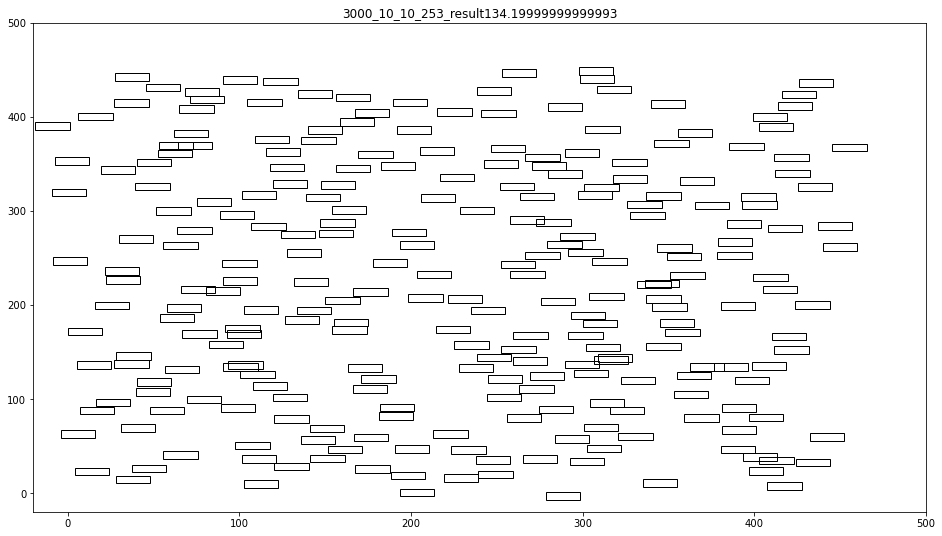

134.29999999999993


In [119]:
prepare_data(1)
test1_name1 = "3000_10_10_253_random"
test1_name2 = "3000_10_10_253_result"
a,b,c,d = tabusearch(iteration_times=3000,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print,costflite=costrod_lite,namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = costroad(a)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=a,name=nameprefix)
# plot_withname(a=a, name=nameprefix)
print(b)
# plt.plot(result_record)
# plt.show()

In [120]:
plot_withname(a=a,name=nameprefix)

IndexError: list index out of range

ValueError: Image size of 4453361x5994206 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x648 with 2 Axes>

初始状态：
175.70000000000002


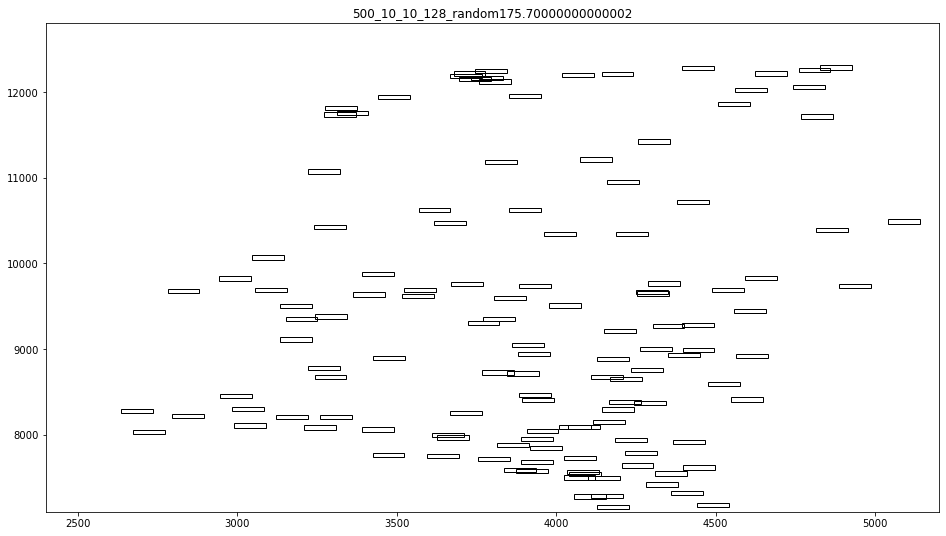

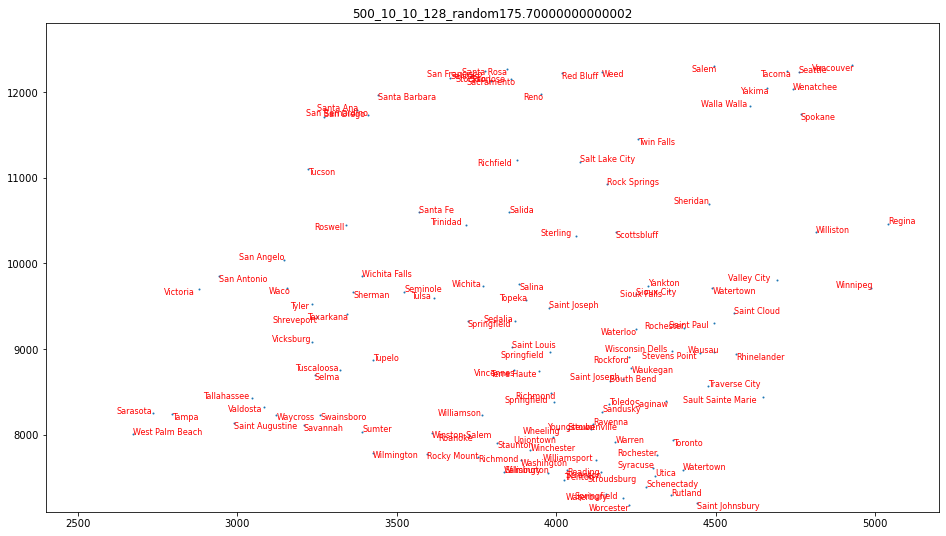

计算次数：3
tabu长度：19
循环次数：0计算次数：3
循环次数：0tabu长度：19
循环次数：50计算次数：2
循环次数：50tabu长度：13
循环次数：100计算次数：1
循环次数：100tabu长度：10
循环次数：150计算次数：2
循环次数：150tabu长度：14
循环次数：200计算次数：2
循环次数：200tabu长度：12
循环次数：250计算次数：1
循环次数：250tabu长度：10
循环次数：300计算次数：2
循环次数：300tabu长度：13
循环次数：350计算次数：1
循环次数：350tabu长度：11
循环次数：400计算次数：2
循环次数：400tabu长度：16
循环次数：450计算次数：2
循环次数：450tabu长度：13
[[1, 4, 0], [2, 3, 1], [3, 3, 0], [4, 1, 0], [5, 2, 0], [6, 4, 0], [7, 2, 0], [8, 4, 0], [9, 3, 0], [10, 3, 0], [11, 1, 0], [12, 1, 0], [13, 3, 0], [14, 3, 0], [15, 3, 0], [16, 2, 0], [17, 2, 0], [18, 4, 0], [19, 4, 0], [20, 3, 0], [21, 2, 0], [22, 2, 0], [23, 3, 0], [24, 1, 0], [25, 3, 0], [26, 3, 1], [27, 1, 0], [28, 1, 0], [29, 2, 0], [30, 3, 0], [31, 3, 0], [32, 3, 0], [33, 2, 0], [34, 2, 0], [35, 4, 0], [36, 1, 0], [37, 4, 0], [38, 3, 0], [39, 2, 0], [40, 1, 0], [41, 2, 0], [42, 3, 0], [43, 2, 0], [44, 4, 0], [45, 2, 0], [46, 4, 0], [47, 1, 0], [48, 1, 0], [49, 2, 0], [50, 2, 0], [51, 2, 0], [52, 4, 0], [53, 4, 0], [54, 4, 0], [55, 2, 0], [56, 3,

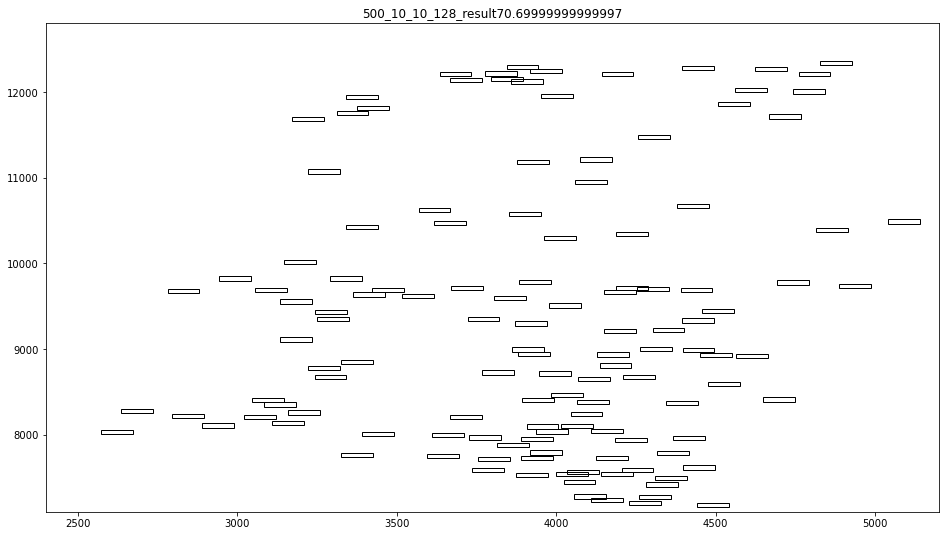

In [ ]:
prepare_data(1)
test1_name1 = "500_10_10_128_random"
test1_name2 = "500_10_10_128_result"
a,b,c,d = tabusearch(iteration_times=500,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print,costflite=costrod_lite,namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = costroad(a)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=a,name=nameprefix)
# plt.plot(result_record)
# plt.show()